# Trapes sum

La igjen oss tegne figurer som illustrerer venstre- og høyre Riemann summer.

## Venstre Riemann sum

![leftintegral](figures/LeftRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081804)

## Høyre Riemann sum

![rightintegral](figures/RightRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081806)

## Gjennomsnitt av Riemann summer

I eksemplene vi har gjort med venstre- og høyre Riemann summer så det ut til at det eksakte integralet er et sted imellom verdien til venstre- og høyre Riemann summen.

Derfor kan vi gjette på at gjennomsnittet mellom er en bedre tilnærming til det eksakte integralet. Før vi tenker for mye over det kan vi kjøre koden fra før på nytt og bruke den til å beregne dette gjennomsnittet.

Jeg forklarer senere hvorfor jeg kaller dette gjennomsnittet trapessummen.

## Eksempel

La $f(x)$ være funksjonen 
$$f(x) = 2\sin(x) + \cos(x)$$. 
For $a = -2$ og $b = 2$ er integralet

$$\int_a^b f(x) dx = \int_{-2}^{2} (2 \sin(x) + \cos(x))dx$$

gitt ved arealet til det blå området minus arealet til det røde området på figuren under:

![mixedIntegral](figures/mixedIntegral.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# først produserer vi listen x

n = 4  # antall intervaller
a = -2 # venstre endepunkt
b = 2  # høyre endepunkt

x = np.linspace(a, b, n + 1)

In [3]:
# dernest forteller vi python om funksjonen f

def f(x):
    return 2*np.sin(x) + np.cos(x)

In [4]:
# dernest produserer vi listen y av funksjonsverdier

y = f(x)

In [5]:
# vi beregner nå våre tilnærminger til integralet

dx = np.diff(x) # steglengdene i listen x
venstre_riemann = dx * np.cumsum(y[:-1]) # tilnærming av integralfunksjonen ved venstre endepunkter
høyre_riemann = dx * np.cumsum(y[1:]) # tilnærming av integralfunksjonen ved høyre endepunkter
trapes = (venstre_riemann + høyre_riemann) / 2

venstre_riemann_sum = venstre_riemann[-1] # venstre Riemann sum
høyre_riemann_sum = høyre_riemann[-1] # høyre Riemann sum
trapes_sum = trapes[-1] # trapes sum

venstre_riemann_sum, trapes_sum, høyre_riemann_sum # vi skriver resultatet ut

(np.float64(-0.15413707846222646),
 np.float64(1.664457775189137),
 np.float64(3.4830526288405004))

### Integralfunksjonen
Fra skolen har vi lært å integrere:

$$F(t) = \int_{a}^t (2\sin(x) + \cos(x)) dx = -2\cos(t) + \sin(t) + 2\cos(a) - \sin(a)$$

**Plot av de tilnærmede integralfunksjonene**

In [6]:
# vi forteller python om integralfunksjonen F(t)
# vi lar tallet a være en parameter i funksjonen

def F(t, a): 
    return (-2 * np.cos(t) + np.sin(t)) - (-2 * np.cos(a) + np.sin(a))  

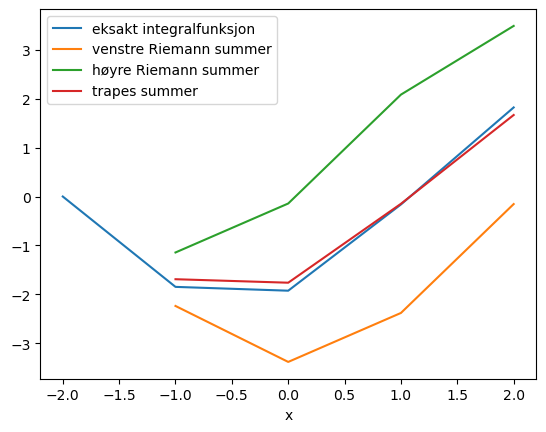

In [8]:
plt.plot(x, F(x,a), label='eksakt integralfunksjon')
plt.plot(x[1:], venstre_riemann, label='venstre Riemann summer')
plt.plot(x[1:], høyre_riemann, label = 'høyre Riemann summer')
plt.plot(x[1:], trapes, label='trapes summer')
plt.xlabel('x')
plt.legend()

## Oppgave

Kjør koden over for $n = 40$ intevaller. Prøv også andre verdier av $n$. Forklar hva du observerer.

## Eksempel

Vi ser nå på funksjonen $f(x) = x$ og integralet

$$\int_{-2}^{1} f(x) dx = \int_{-2}^1 xdx$$

### Under finner du:

1. En formel for funksjonen $F(t)$ gitt ved integralet $$F(t) = \int_{-2}^t xdx.$$
2. Modifikasjon av koden over til å tilnærme integralet $\int_{-2}^1 xdx$. (Prøv både å bruke 4 og 40 intevaller.)

In [9]:
# først produserer vi listen x

n = 4  # antall intervaller
a = -2 # venstre endepunkt
b = 1  # høyre endepunkt

x = np.linspace(a, b, n + 1)

In [10]:
# dernest forteller vi python om funksjonen f

def f(x):
    return x

In [11]:
# dernest produserer vi listen y av funksjonsverdier

y = f(x)

In [12]:
# vi beregner nå våre tilnærminger til integralet

dx = np.diff(x) # steglengdene i listen x
venstre_riemann = dx * np.cumsum(y[:-1]) # tilnærming av integralfunksjonen ved venstre endepunkter
høyre_riemann = dx * np.cumsum(y[1:]) # tilnærming av integralfunksjonen ved høyre endepunkter
trapes = (venstre_riemann + høyre_riemann) / 2

venstre_riemann_sum = venstre_riemann[-1] # venstre Riemann sum
høyre_riemann_sum = høyre_riemann[-1] # høyre Riemann sum
trapes_sum = trapes[-1] # trapes sum

venstre_riemann_sum, trapes_sum, høyre_riemann_sum # vi skriver resultatet ut

(np.float64(-2.625), np.float64(-1.5), np.float64(-0.375))

In [13]:
venstre_riemann

array([-1.5   , -2.4375, -2.8125, -2.625 ])

In [14]:
høyre_riemann

array([-0.9375, -1.3125, -1.125 , -0.375 ])

In [15]:
integral = 0.5 * x**2 - 2

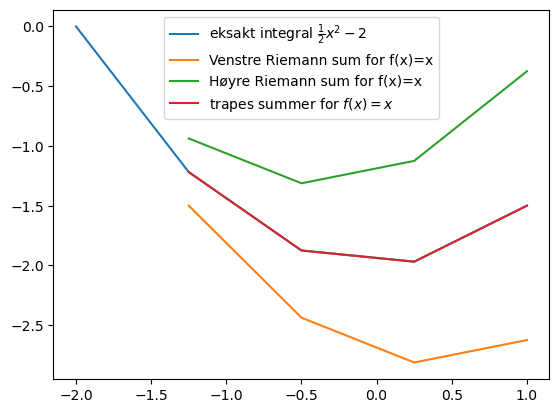

In [17]:
plt.plot(x, integral, label=r'eksakt integral $\frac{1}{2}x^2 - 2$')
plt.plot(x[1:], venstre_riemann, label='Venstre Riemann sum for f(x)=x')
plt.plot(x[1:], høyre_riemann, label='Høyre Riemann sum for f(x)=x')
plt.plot(x[1:], trapes, label=r'trapes summer for $f(x) = x$')

plt.legend()

### Spørsmål

Blir trapes summene lik det eksakte integralet i eksemplet over? Kan du forklare hvorfor eller hvorfor ikke?

## Eksempel

La 
$$f(x) = \frac{1}{\sqrt{2*\pi}} e^{- \frac{x^2}{2}}$$
Plot den tilnærmede integralfunksjonen
$$F(x) = 0.5 + \int_{0}^x f(t) d t$$
på intervallet fra $0$ til $2$. (Opp til fem desimalers presisjon er $F(2) = 0.97725$)

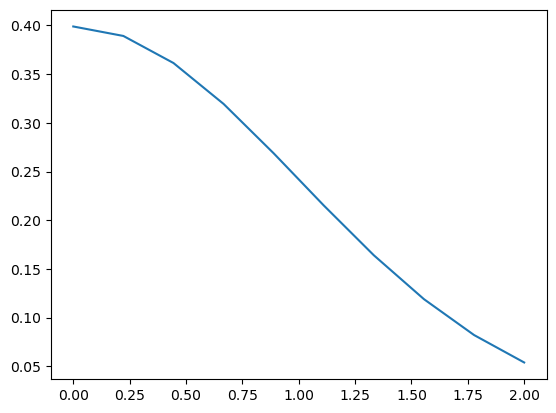

In [18]:
def f(x):
    return np.exp(-x**2/2) / np.sqrt((2 * np.pi))

n = 10
# Oppretter et NumPy array med n jevnt fordelte verdier mellom 0 og 2 (inkludert)
x = np.linspace(0, 2, n) 

plt.plot(x, f(x))

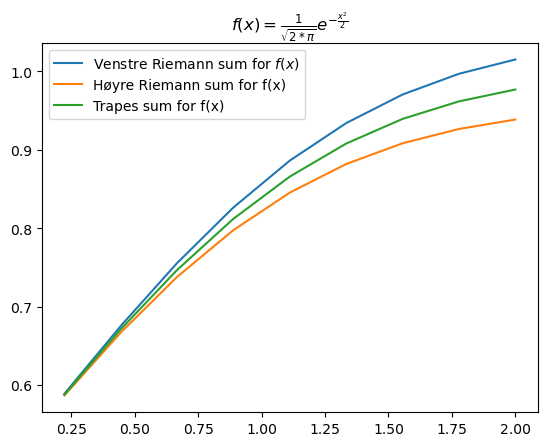

In [28]:
# Leser av avstanden mellom punktene i arrayet x
dx = x[1] - x[0]
# Lager arrayet y med funksjonsverdiene til f anvendt på elementene i x untatt siste elementet
yv = f(x[:-1])
# Lager en arrayet y med funksjonsverdiene til f anvendt på elementene i x untatt første elementet
yh = f(x[1:])

# Approksimerer integralet av funksjonen representert ved y ved hjelp av venstre Riemann summer
zv = 0.5 + dx * np.cumsum(yv)

# Approksimerer integralet av funksjonen representert ved y ved hjelp av høyre Riemann summer
zh = 0.5 + dx * np.cumsum(yh)

zt = (zv + zh) / 2

plt.title(r'$f(x) = \frac{1}{\sqrt{2*\pi}} e^{- \frac{x^2}{2}}$') #r'$f(x) = \frac{1}{\sqrt{2*\pi}} e^{- \frac{x^2}{2}}$)
plt.plot(x[1:], zv, label=r'Venstre Riemann sum for $f(x)$')
plt.plot(x[1:], zh, label=r'Høyre Riemann sum for f(x)')
plt.plot(x[1:], zt, label=r'Trapes sum for f(x)')
plt.legend();

## Trapes Riemann sum

For trapes regelen blir funksjonen approksimert av gjennomsnittet af verdiene sine i høyre og venstre endepunkter av delintervallene.

![leftintegral](figures/TrapRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081807)

### Oppgave

Forklar hvorfor gjennomsnittet mellom venstre- og høyre Riemann summene er lik arealet under den blå kurven i figuren over.

![leftintegral](figures/LeftRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081804)

![rightintegral](figures/RightRiemann2.svg)
[By Qef - Own work, Public Domain](https://commons.wikimedia.org/w/index.php?curid=7081806)

## Litt om feil

Dersom funksjonen $f(x)$ er "fin" finnes det metoder til å beskrive forskjellen mellom våre numeriske apporksjmasjoner til integralet av funksjonen og det eksakte integralet. Hvis vi ikke vet mere om funksjonen enn en liste av funksjonsverdier kan ikke disse metodene brukes. Metodene kan likevel være viktige for å vurdere om beregningene vi gjør er fornuftige og rimelige. Kort fortalt er de numeriske resultatene antakelig pålitelige dersom de stort sett stemmer overens for mange forskjellige steglengder $dx$. For empirisk data kan dette avprøves ved å utelate data og se om det endrer på resultatene. 

## Feil for trapesregelen

Dersom funksjonen $f(x)$ er to ganger deriverbar og definert på et åpent intervall som inneholder $[a,b]$, da er forskjellen mellom resultatet av trapesregelen og integralet 
$\int_a^b f(x) d x$ mindre enn 
$$\frac{(b - a)^3}{12n^2} f''(t)$$
for en $t$ i $[a,b]$. Her er $n$ antallet av delintervaller.

[Her er en quiz om numerisk integrasjon. Den var del av eksamen i fjor.](https://mitt.uib.no/courses/50911/quizzes/48225)